<a href="https://colab.research.google.com/github/gyuholee94/NLP/blob/master/%EB%84%A4%EC%9D%B4%EB%B2%84_%EC%98%81%ED%99%94%EB%A6%AC%EB%B7%B0_%EA%B0%90%EC%84%B1%EB%B6%84%EC%84%9D(0_84%EA%B9%8C%EC%A7%80_%EC%98%AC%EB%A6%BC)_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import urllib.request
%matplotlib inline
import matplotlib.pyplot as plt
import re
from tensorflow.keras.preprocessing.text import Tokenizer
import numpy as np
from tensorflow.keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt
import pickle

In [1]:
stopwords_kor = ["!","\"","$","%","&","'","(",")","*","+",",","-",".","...","0","1","2","3","4","5","6","7","8","9",";","<","=",">","?","@","\\","^","_","`","|","~","·","—","——","'","'",""",""","…","、","。","〈","〉","《","》","가","가까스로","가령","각","각각","각자","각종","갖고말하자면","같다","같이","개의치않고","거니와","거바","거의","것","것과 같이","것들","게다가","게우다","겨우","견지에서","결과에 이르다","결국","결론을 낼 수 있다","겸사겸사","고려하면","고로","곧","공동으로","과","과연","관계가 있다","관계없이","관련이 있다","관하여","관한","관해서는","구","구체적으로","구토하다","그","그들","그때","그래","그래도","그래서","그러나","그러니","그러니까","그러면","그러므로","그러한즉","그런 까닭에","그런데","그런즉","그럼","그럼에도 불구하고","그렇게 함으로써","그렇지","그렇지 않다면","그렇지 않으면","그렇지만","그렇지않으면","그리고","그리하여","그만이다","그에 따르는","그위에","그저","그중에서","그치지 않다","근거로","근거하여","기대여","기점으로","기준으로","기타","까닭으로","까악","까지","까지 미치다","까지도","꽈당","끙끙","끼익","나","나머지는","남들","남짓","너","너희","너희들","네","넷","년","논하지 않다","놀라다","누가 알겠는가","누구","다른","다른 방면으로","다만","다섯","다소","다수","다시 말하자면","다시말하면","다음","다음에","다음으로","단지","답다","당신","당장","대로 하다","대하면","대하여","대해 말하자면","대해서","댕그","더구나","더군다나","더라도","더불어","더욱더","더욱이는","도달하다","도착하다","동시에","동안","된바에야","된이상","두번째로","둘","둥둥","뒤따라","뒤이어","든간에","들","등","등등","딩동","따라","따라서","따위","따지지 않다","딱","때","때가 되어","때문에","또","또한","뚝뚝","라 해도","령","로","로 인하여","로부터","로써","륙","를","마음대로","마저","마저도","마치","막론하고","만 못하다","만약","만약에","만은 아니다","만이 아니다","만일","만큼","말하자면","말할것도 없고","매","매번","메쓰겁다","몇","모","모두","무렵","무릎쓰고","무슨","무엇","무엇때문에","물론","및","바꾸어말하면","바꾸어말하자면","바꾸어서 말하면","바꾸어서 한다면","바꿔 말하면","바로","바와같이","밖에 안된다","반대로","반대로 말하자면","반드시","버금","보는데서","보다더","보드득","본대로","봐","봐라","부류의 사람들","부터","불구하고","불문하고","붕붕","비걱거리다","비교적","비길수 없다","비로소","비록","비슷하다","비추어 보아","비하면","뿐만 아니라","뿐만아니라","뿐이다","삐걱","삐걱거리다","사","삼","상대적으로 말하자면","생각한대로","설령","설마","설사","셋","소생","소인","솨","쉿","습니까","습니다","시각","시간","시작하여","시초에","시키다","실로","심지어","아","아니","아니나다를가","아니라면","아니면","아니었다면","아래윗","아무거나","아무도","아야","아울러","아이","아이고","아이구","아이야","아이쿠","아하","아홉","안 그러면","않기 위하여","않기 위해서","알 수 있다","알았어","앗","앞에서","앞의것","야","약간","양자","어","어기여차","어느","어느 년도","어느것","어느곳","어느때","어느쪽","어느해","어디","어때","어떠한","어떤","어떤것","어떤것들","어떻게","어떻해","어이","어째서","어쨋든","어쩔수 없다","어찌","어찌됏든","어찌됏어","어찌하든지","어찌하여","언제","언젠가","얼마","얼마 안 되는 것","얼마간","얼마나","얼마든지","얼마만큼","얼마큼","엉엉","에","에 가서","에 달려 있다","에 대해","에 있다","에 한하다","에게","에서","여","여기","여덟","여러분","여보시오","여부","여섯","여전히","여차","연관되다","연이서","영","영차","옆사람","예","예를 들면","예를 들자면","예컨대","예하면","오","오로지","오르다","오자마자","오직","오호","오히려","와","와 같은 사람들","와르르","와아","왜","왜냐하면","외에도","요만큼","요만한 것","요만한걸","요컨대","우르르","우리","우리들","우선","우에 종합한것과같이","운운","월","위에서 서술한바와같이","위하여","위해서","윙윙","육","으로","으로 인하여","으로서","으로써","을","응","응당","의","의거하여","의지하여","의해","의해되다","의해서","이","이 되다","이 때문에","이 밖에","이 외에","이 정도의","이것","이곳","이때","이라면","이래","이러이러하다","이러한","이런","이럴정도로","이렇게 많은 것","이렇게되면","이렇게말하자면","이렇구나","이로 인하여","이르기까지","이리하여","이만큼","이번","이봐","이상","이어서","이었다","이와 같다","이와 같은","이와 반대로","이와같다면","이외에도","이용하여","이유만으로","이젠","이지만","이쪽","이천구","이천육","이천칠","이천팔","인 듯하다","인젠","일","일것이다","일곱","일단","일때","일반적으로","일지라도","임에 틀림없다","입각하여","입장에서","잇따라","있다","자","자기","자기집","자마자","자신","잠깐","잠시","저","저것","저것만큼","저기","저쪽","저희","전부","전자","전후","점에서 보아","정도에 이르다","제","제각기","제외하고","조금","조차","조차도","졸졸","좀","좋아","좍좍","주룩주룩","주저하지 않고","줄은 몰랏다","줄은모른다","중에서","중의하나","즈음하여","즉","즉시","지든지","지만","지말고","진짜로","쪽으로","차라리","참","참나","첫번째로","쳇","총적으로","총적으로 말하면","총적으로 보면","칠","콸콸","쾅쾅","쿵","타다","타인","탕탕","토하다","통하여","툭","퉤","틈타","팍","팔","퍽","펄렁","하","하게될것이다","하게하다","하겠는가","하고 있다","하고있었다","하곤하였다","하구나","하기 때문에","하기 위하여","하기는한데","하기만 하면","하기보다는","하기에","하나","하느니","하는 김에","하는 편이 낫다","하는것도","하는것만 못하다","하는것이 낫다","하는바","하더라도","하도다","하도록시키다","하도록하다","하든지","하려고하다","하마터면","하면 할수록","하면된다","하면서","하물며","하여금","하여야","하자마자","하지 않는다면","하지 않도록","하지마","하지마라","하지만","하하","한 까닭에","한 이유는","한 후","한다면","한다면 몰라도","한데","한마디","한적이있다","한켠으로는","한항목","할 따름이다","할 생각이다","할 줄 안다","할 지경이다","할 힘이 있다","할때","할만하다","할망정","할뿐","할수있다","할수있어","할줄알다","할지라도","할지언정","함께","해도된다","해도좋다","해봐요","해서는 안된다","해야한다","해요","했어요","향하다","향하여","향해서","허","허걱","허허","헉","헉헉","헐떡헐떡","형식으로 쓰여","혹시","혹은","혼자","훨씬","휘익","휴","흐흐","흥","힘입어","︿","！","＃","＄","％","＆","（","）","＊","＋","，","０","１","２","３","４","５","６","７","８","９","：","；","＜","＞","？","＠","［","］","｛","｜","｝","～","￥"]
len(stopwords_kor)

678

In [ ]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/e9t/nsmc/master/ratings_train.txt", filename="ratings_train.txt")
urllib.request.urlretrieve("https://raw.githubusercontent.com/e9t/nsmc/master/ratings_test.txt", filename="ratings_test.txt")

('ratings_test.txt', <http.client.HTTPMessage at 0x7f0b32e301d0>)

In [ ]:
train_data = pd.read_table('ratings_train.txt')
test_data = pd.read_table('ratings_test.txt')

In [ ]:
print('훈련용 리뷰 개수 :',len(train_data)) # 훈련용 리뷰 개수 출력

훈련용 리뷰 개수 : 150000


In [ ]:
train_data[:10] # 상위 5개 출력

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1
5,5403919,막 걸음마 뗀 3세부터 초등학교 1학년생인 8살용영화.ㅋㅋㅋ...별반개도 아까움.,0
6,7797314,원작의 긴장감을 제대로 살려내지못했다.,0
7,9443947,별 반개도 아깝다 욕나온다 이응경 길용우 연기생활이몇년인지..정말 발로해도 그것보단...,0
8,7156791,액션이 없는데도 재미 있는 몇안되는 영화,1
9,5912145,왜케 평점이 낮은건데? 꽤 볼만한데.. 헐리우드식 화려함에만 너무 길들여져 있나?,1


In [ ]:
train_data['document'].nunique(), train_data['label'].nunique()

(146182, 2)

In [ ]:
train_data.drop_duplicates(subset=['document'], inplace=True) # document 열에서 중복인 내용이 있다면 중복 제거

In [ ]:
print('총 샘플의 수 :',len(train_data))

총 샘플의 수 : 146183


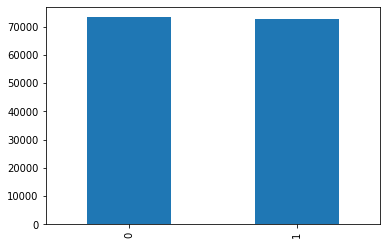

In [ ]:
train_data['label'].value_counts().plot(kind = 'bar')

In [ ]:
print(train_data.groupby('label').size().reset_index(name = 'count'))

   label  count
0      0  73342
1      1  72841


In [ ]:
print(train_data.isnull().values.any())

True


In [ ]:
print(train_data.isnull().sum())

id          0
document    1
label       0
dtype: int64


In [ ]:
train_data.loc[train_data.document.isnull()]

,id,document,label
25857,2172111,NaN,1


In [ ]:
train_data = train_data.dropna(how = 'any') # Null 값이 존재하는 행 제거
print(train_data.isnull().values.any()) # Null 값이 존재하는지 확인

False


In [ ]:
print(len(train_data))

146182


In [ ]:
text = 'do!!! you expect... people~ to~ read~ the FAQ, etc. and actually accept hard~! atheism?@@'
re.sub(r'[^a-zA-Z ]', '', text) #알파벳과 공백을 제외하고 모두 제거

'do you expect people to read the FAQ etc and actually accept hard atheism'

In [ ]:
train_data['document'] = train_data['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
# 한글과 공백을 제외하고 모두 제거
train_data[:5]

,id,document,label
0,9976970,아 더빙 진짜 짜증나네요 목소리,0
1,3819312,흠포스터보고 초딩영화줄오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 솔직히 재미는 없다평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화스파이더맨에서 늙어보이기만 했던 커스틴 던...,1


In [ ]:
train_data['document'].replace('', np.nan, inplace=True)
print(train_data.isnull().sum())

id            0
document    391
label         0
dtype: int64


In [ ]:
train_data.loc[train_data.document.isnull()][:5]

,id,document,label
584,7117896,NaN,0
593,6478189,NaN,0
638,9364602,NaN,0
668,1600635,NaN,0
1559,6918082,NaN,1


In [ ]:
train_data = train_data.dropna(how = 'any')
print(len(train_data))

145791


In [ ]:
test_data.drop_duplicates(subset = ['document'], inplace=True) # document 열에서 중복인 내용이 있다면 중복 제거
test_data['document'] = test_data['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","") # 정규 표현식 수행
test_data['document'].replace('', np.nan, inplace=True) # 공백은 Null 값으로 변경
test_data = test_data.dropna(how='any') # Null 값 제거
print('전처리 후 테스트용 샘플의 개수 :',len(test_data))

전처리 후 테스트용 샘플의 개수 : 48995


#불용어 안빼기로 함. 나중에 다른방식과 비교해보자. 
### stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']
https://www.ranks.nl/stopwords/korean


In [ ]:
!sudo apt-get install g++ openjdk-7-jdk # Install Java 1.7+
!sudo apt-get install python-dev; pip install konlpy     # Python 2.x
!sudo apt-get install python3-dev; pip3 install konlpy   # Python 3.x
!sudo apt-get install curl
!bash <(curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh)

Reading package lists... Done
Building dependency tree       
Reading state information... Done
Package openjdk-7-jdk is not available, but is referred to by another package.
This may mean that the package is missing, has been obsoleted, or
is only available from another source

E: Package 'openjdk-7-jdk' has no installation candidate
Reading package lists... Done
Building dependency tree       
Reading state information... Done
python-dev is already the newest version (2.7.15~rc1-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.
     |████████████████████████████████| 19.4MB 1.3MB/s 
     |████████████████████████████████| 92kB 7.5MB/s 
     |████████████████████████████████| 3.8MB 37.5MB/s 
ERROR: Operation cancelled by user
Reading package lists... Done
Building dependency tree       
Reading state information... Done
python3-d

In [ ]:
from konlpy.tag import Okt

In [ ]:
from konlpy.tag import Mecab


In [ ]:
mecab = Mecab()

In [ ]:
okt = Okt()

In [ ]:
okt.morphs('와 이런것도 영화라고 차라리 뮤직비디오를 만드는 게 나을 뻔', stem =True)#lemma해주네

In [ ]:
mecab.morphs('와 이런것도 영화라고 차라리 뮤직비디오를 만드는 게 나을 뻔')#그냥 자르네

#Mecab활용, stopword 안 씀

In [ ]:
X_train_MECAB = []
for sentence in train_data['document']:
  temp_X = []
  temp_X = mecab.morphs(sentence)
  temp_X = [word for word in temp_X]
  X_train_MECAB.append(temp_X)

In [ ]:
X_test_MECAB = []
for sentence in test_data['document']:
  temp_X = []
  temp_X = mecab.morphs(sentence)
  temp_X = [word for word in temp_X]
  X_test_MECAB.append(temp_X)

In [ ]:
X_train_MECAB[:3]

[['아', '더', '빙', '진짜', '짜증', '나', '네요', '목소리'],
 ['흠', '포스터', '보고', '초딩', '영화', '줄', '오버', '연기', '조차', '가볍', '지', '않', '구나'],
 ['너무', '재', '밓었다그래서보는것을추천한다']]

In [ ]:
X_test_MECAB[:3]

[['굳', 'ㅋ'],
 ['뭐',
  '야',
  '이',
  '평점',
  '들',
  '은',
  '나쁘',
  '진',
  '않',
  '지만',
  '점',
  '짜리',
  '는',
  '더더욱',
  '아니',
  '잖아'],
 ['지루',
  '하',
  '지',
  '는',
  '않',
  '은데',
  '완전',
  '막장',
  '임',
  '돈',
  '주',
  '고',
  '보',
  '기',
  '에',
  '는']]

In [ ]:
X_train_MECAB
X_test_MECAB
X_train_OKT
X_test_OKT

[['굳다', 'ㅋ'],
 ['뭐',
  '야',
  '이',
  '평점',
  '들',
  '은',
  '나쁘다',
  '않다',
  '점',
  '짜다',
  '리',
  '는',
  '더',
  '더욱',
  '아니다'],
 ['지루하다', '않다', '완전', '막장', '임', '돈', '주다', '보기', '에는'],
 ['만',
  '아니다',
  '별',
  '다섯',
  '개',
  '주다',
  '왜',
  '로',
  '나오다',
  '제',
  '심기',
  '를',
  '불편하다',
  '하다'],
 ['음악', '이', '주가', '되다', '최고', '의', '음악', '영화'],
 ['진정하다', '쓰레기'],
 ['마치',
  '미국',
  '애니',
  '에서',
  '튀어나오다',
  '한',
  '창의력',
  '없다',
  '로봇',
  '디자인',
  '부터가',
  '고개',
  '를',
  '젖다',
  '하다'],
 ['갈수록',
  '개판',
  '되다',
  '중국영화',
  '유치하다',
  '내용',
  '없다',
  '폼',
  '잡다',
  '끝나다',
  '말',
  '도',
  '안되다',
  '무기',
  '에',
  '유치하다',
  '남무',
  '아',
  '그리다',
  '동사서독',
  '같다',
  '영화',
  '가',
  '이건',
  '류',
  '아',
  '류작',
  '이다'],
 ['이별',
  '의',
  '아픔',
  '뒤',
  '에',
  '찾아오다',
  '새롭다',
  '인연',
  '의',
  '기쁨',
  '모든',
  '사람',
  '이',
  '그렇다',
  '않다'],
 ['괜찮다', '오랜', '만', '포켓몬스터', '잼밌', '어', '요'],
 ['한국', '독립영화', '의', '한계', '그렇게', '아버지', '가', '되다', '비교', '되다'],
 ['청춘',
  '은',
  '아름답다',
  '그',
  '아름답다',
  '움',
  '은

#OKT활용, stopword 안 씀

In [ ]:
X_train_OKT = []
for sentence in train_data['document']:
  temp_X = []
  temp_X = okt.morphs(sentence, stem=True)
  temp_X = [word for word in temp_X]
  X_train_OKT.append(temp_X)

In [ ]:
X_test_OKT = []
for sentence in test_data['document']:
  temp_X = []
  temp_X = okt.morphs(sentence, stem=True)
  temp_X = [word for word in temp_X]
  X_test_OKT.append(temp_X)

In [ ]:
k=[]# okt 트레인 데이터의 문장중에 가장 긴 문장이 몇가지 단어로 이루어졌는지 확인하는 함수
for i in range(len(X_train_OKT)):
  k.append(len(X_train_OKT[i]))
m = sorted(k)
m[-1]

78

145791

In [ ]:
kdf = pd.DataFrame(np.array(k), columns=['문장별 단어갯수'])
kdf

,문장별 단어갯수
0,5
1,11
2,9
3,9
4,20
...,...
145786,9
145787,4
145788,13
145789,11


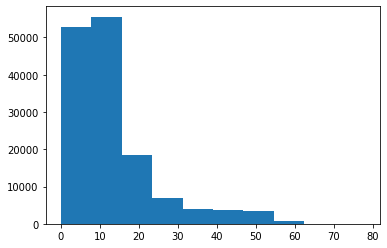

In [ ]:
plt.hist(kdf['문장별 단어갯수'])
plt.show()#단어길이의 지표

In [ ]:
X_train_OKT[:3]

[['아', '더빙', '진짜', '짜증나다', '목소리'],
 ['흠', '포스터', '보고', '초딩', '영화', '줄', '오버', '연기', '조차', '가볍다', '않다'],
 ['너', '무재', '밓었', '다그', '래서', '보다', '추천', '한', '다']]

In [ ]:
X_test_OKT[:3]

[['굳다', 'ㅋ'],
 ['뭐',
  '야',
  '이',
  '평점',
  '들',
  '은',
  '나쁘다',
  '않다',
  '점',
  '짜다',
  '리',
  '는',
  '더',
  '더욱',
  '아니다'],
 ['지루하다', '않다', '완전', '막장', '임', '돈', '주다', '보기', '에는']]

In [ ]:
import pandas as pd
import pickle

In [ ]:
df_train_MECAB = pd.DataFrame(np.array(X_train_MECAB), columns=['X_train_MECAB'])

In [ ]:
df_test_MECAB = pd.DataFrame(np.array(X_test_MECAB), columns=['X_test_MECAB'])

In [ ]:
df_train_OKT = pd.DataFrame(np.array(X_train_OKT), columns=['X_train_OKT'])

In [ ]:
df_test_OKT = pd.DataFrame(np.array(X_test_OKT), columns=['X_test_OKT'])

In [ ]:
df_train_MECAB.to_pickle('X_train_MECAB.pkl')
df_test_MECAB.to_pickle('X_test_MECAB.pkl')
df_train_OKT.to_pickle('X_train_OKT.pkl')
df_test_OKT.to_pickle('X_test_OKT.pkl')

In [ ]:
df_train_MECAB.to_csv('X_train_MECAB.csv')
df_test_MECAB.to_csv('X_test_MECAB.csv')
df_train_OKT.to_csv('X_train_OKT.csv')
df_test_OKT.to_csv('X_test_OKT.csv')

#저장까지 완료

#처음 시험


In [ ]:
# import numpy as np

# train_dataset, test_dataset = X_train_MECAB, [train_data['label']

# training_sentences = []
# training_labels = []

# testing_sentences = []
# testing_labels = []


# for s, l in train_dataset:
#   training_sentences.append(s.numpy().decode('utf8'))
#   training_labels.append(l.numpy())


# for s, l in test_dataset:
#   testing_sentences.append(s.numpy().decode('utf8'))
#   testing_labels.append(l.numpy())

# training_labels_final = np.array(training_labels)
# testing_labels_final = np.array(testing_labels)


ValueError: ignored

In [ ]:
# X_train_OKT[0]

['아', '더빙', '진짜', '짜증나다', '목소리']

In [ ]:
# OKT_train = []
# for i in range(len(X_train_OKT)):
#   OKT_train.append((' ').join(X_train_OKT[i]))
# OKT_train

['아 더빙 진짜 짜증나다 목소리',
 '흠 포스터 보고 초딩 영화 줄 오버 연기 조차 가볍다 않다',
 '너 무재 밓었 다그 래서 보다 추천 한 다',
 '교도소 이야기 구먼 솔직하다 재미 는 없다 평점 조정',
 '사이 몬페 그 의 익살스럽다 연기 가 돋보이다 영화 스파이더맨 에서 늙다 보이다 하다 커스틴 던스트 가 너무나도 이쁘다 보이다',
 '막 걸음 마 떼다 세 부터 초등학교 학년 생인 살다 영화 ㅋㅋㅋ 별 반개 도 아깝다 움',
 '원작 의 긴장감 을 제대로 살리다 하다',
 '별 반개 도 아깝다 욕 나오다 이응경 길용우 연 기 생활 이 몇 년 인지 정말 발 로 해도 그것 보단 낫다 납치 감금 만 반복 반복 이 드라마 는 가족 도 없다 연기 못 하다 사람 만 모 엿 네',
 '액션 이 없다 재미 있다 몇 안되다 영화',
 '왜케 평점 이 낮다 꽤 볼 만 한 데 헐리우드 식 화려하다 너무 길들이다 있다',
 '걍 인피니트 가 짱 이다 진짜 짱 이다',
 '볼때 마다 눈물나다 죽다 년대 의 향수 자 극 허진호 는 감성 절제 멜로 의 달인 이다',
 '울면 서 손 들 고 횡단보도 건너다 때 뛰다 치다 올 뻔 이범수 연기 드럽다 못 하다',
 '담백하다 깔끔하다 좋다 신 문 기 사 로만 보다 보다 자꾸 잊어버리다 그 들 도 사람 이다 것 을',
 '취향 은 존중 한 다지 만 진짜 내생 에 극장 에서 보다 영화 중 가장 노잼 노 감동 임 스토리 도 어거지 고 감동 도 어거지',
 'ㄱ 냥 매번 긴장 되다 재밋음 ㅠㅠ',
 '차다 사람 들 웃기다 바스코 가 이기 면 락스 코 라고 끄다 바비 가 이기 면 아이돌 이라고 깔다 다그 냥 끄다 안달 난 것 처럼 보이다',
 '굿바이 레닌 표절 인 것 은 이해 하다 왜 뒤 로 갈수록 재미 없어지다',
 '이건 정말 깨알 캐스팅 과 질퍽 하 지 않다 산뜻하다 내 용구성 이 자다 버무러진 깨알 일드',
 '약탈 자 를 위 한 변명 이르다 저 놈 들 은 착하다 놈 들 절대 아니다 걸 요',
 '나름 심오하다 뜻 도 있다 듯 

In [ ]:
# OKT_test = []
# for i in range(len(X_test_OKT)):
#   OKT_test.append((' ').join(X_test_OKT[i]))
# OKT_test

['굳다 ㅋ',
 '뭐 야 이 평점 들 은 나쁘다 않다 점 짜다 리 는 더 더욱 아니다',
 '지루하다 않다 완전 막장 임 돈 주다 보기 에는',
 '만 아니다 별 다섯 개 주다 왜 로 나오다 제 심기 를 불편하다 하다',
 '음악 이 주가 되다 최고 의 음악 영화',
 '진정하다 쓰레기',
 '마치 미국 애니 에서 튀어나오다 한 창의력 없다 로봇 디자인 부터가 고개 를 젖다 하다',
 '갈수록 개판 되다 중국영화 유치하다 내용 없다 폼 잡다 끝나다 말 도 안되다 무기 에 유치하다 남무 아 그리다 동사서독 같다 영화 가 이건 류 아 류작 이다',
 '이별 의 아픔 뒤 에 찾아오다 새롭다 인연 의 기쁨 모든 사람 이 그렇다 않다',
 '괜찮다 오랜 만 포켓몬스터 잼밌 어 요',
 '한국 독립영화 의 한계 그렇게 아버지 가 되다 비교 되다',
 '청춘 은 아름답다 그 아름답다 움 은 이성 을 흔들다 놓다 찰나 의 아름답다 움 을 자다 포착 한 섬세하다 아름답다 수채화 같다 퀴어 영화 이다',
 '눈 에 보이다 반전 이다 영화 의 흡인 력 은 사라지다 않다',
 '스토리 연출 연기 비주 얼 등 영화 의 기본 조차 안되다 영화 에 무슨 평 을 해 이렇다 영화 찍다 김문옥 감독 은 내 가 영화 경력 이 몇 인데 조무래기 들 이 내 영화 를 평론 하다 같다 마인드 에 빠지다',
 '소위 ㅈ 문 가라 는 평점 은 뭐 냐',
 '최고',
 '발연기 도저히 못 보다 진짜 이렇게 연기 를 못 하다 상상 도 못 하다',
 '나이스',
 '별 재미 도 없다 우려 먹다 챔프 에서 방송 몇번 하다 ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ',
 '일 의 금요일 나이트메어 시리즈 와 함께 가장 많다 시리즈 를 양산 해내다 헬레 이 저 시리즈 의 첫 편 작가 의 상상력 이 돋보이다 작품 이며 갈고리 로 사지 찢다 고어씬 은 지금 보더 라도 상당하다 잔인하다 충격 적 이다',
 '나름 교훈 돋다 하지만 어쩔 수없이 저 평점 받다 없다 저 질 섹스 코미디',
 '꽤 재밌다 보다 영화 이다',
 '민주화 시대 의 

In [ ]:
# MECAB_train = []
# for i in range(len(X_train_MECAB)):
#   MECAB_train.append((' ').join(X_train_MECAB[i]))
# MECAB_train

['아 더 빙 진짜 짜증 나 네요 목소리',
 '흠 포스터 보고 초딩 영화 줄 오버 연기 조차 가볍 지 않 구나',
 '너무 재 밓었다그래서보는것을추천한다',
 '교도소 이야기 구먼 솔직히 재미 는 없 다 평점 조정',
 '사이몬페그 의 익살 스런 연기 가 돋보였 던 영화 스파이더맨 에서 늙 어 보이 기 만 했 던 커스틴 던스트 가 너무나 도 이뻐 보였 다',
 '막 걸음마 뗀 세 부터 초등 학교 학년 생 인 살용 영화 ㅋㅋㅋ 별반 개 도 아까움',
 '원작 의 긴장감 을 제대로 살려 내 지 못했 다',
 '별 반개 도 아깝 다 욕 나온다 이응경 길용우 연기 생활 이 몇 년 인지 정말 발 로 해도 그것 보단 낫 겟 다 납치 감금 만 반복 반복 이 드라마 는 가족 도 없 다 연기 못 하 는 사람 만 모엿 네',
 '액션 이 없 는데 도 재미 있 는 몇 안 되 는 영화',
 '왜 케 평점 이 낮 은 건데 꽤 볼 만 한데 헐리우드 식 화려 함 에 만 너무 길들여져 있 나',
 '걍인피니트가짱이다진짜짱이다',
 '볼 때 마다 눈물나 서 죽 겠 다 년 대 의 향수 자극 허진호 는 감성 절제 멜로 의 달인 이 다',
 '울 면서 손들 고 횡단 보도 건널 때 뛰쳐나올 뻔 이범수 연기 드럽 게 못해',
 '담백 하 고 깔끔 해서 좋 다 신문 기사 로 만 보다 보 면 자꾸 잊어버린다 그 들 도 사람 이 었 다는 것 을',
 '취향 은 존중 한다지만 진짜 내생 에 극장 에서 본 영화 중 가장 노 잼 노 감동 임 스토리 도 어 거지 고 감동 도 어거지',
 'ㄱ 냥 매번 긴장 되 고 재 밋 음 ㅠㅠ',
 '참 사람 들 웃긴 게 바스코 가 이기면 락스 코 라고 까 고 바비 가 이기 면 아이돌 이 라고 깐다 그냥 까 고 싶 어서 안달 난 것 처럼 보인다',
 '굿바이 레닌 표절 인 것 은 이해 하 는데 왜 뒤 로 갈수록 재미없 어 지 냐',
 '이건 정말 깨알 캐스팅 과 질퍽 하 지 않 은 산뜻 한 내용 구성 이 잘 버 무 러진 깨알 일 드',
 '약탈자 를 위한 변명 이 라 저놈 

In [ ]:
# MECAB_test = []
# for i in range(len(X_test_MECAB)):
#   MECAB_test.append((' ').join(X_test_MECAB[i]))
# MECAB_test

['굳 ㅋ',
 '뭐 야 이 평점 들 은 나쁘 진 않 지만 점 짜리 는 더더욱 아니 잖아',
 '지루 하 지 는 않 은데 완전 막장 임 돈 주 고 보 기 에 는',
 '만 아니 었 어도 별 다섯 개 줬 을 텐데 왜 로 나와서 제 심기 를 불편 하 게 하 죠',
 '음악 이 주 가 된 최고 의 음악 영화',
 '진정 한 쓰레기',
 '마치 미국 애니 에서 튀어나온 듯 한 창의 력 없 는 로봇 디자인 부터 가 고개 를 젖 게 한다',
 '갈수록 개판 되 가 는 중국 영화 유치 하 고 내용 없 음 폼 잡 다 끝 남 말 도 안 되 는 무기 에 유치 한 남무 아 그립 다 동사서독 같 은 영화 가 이건 류 아류 작 이 다',
 '이별 의 아픔 뒤 에 찾아오 는 새로운 인연 의 기쁨 모든 사람 이 그렇 지 는 않 네',
 '괜찮 네요 오랜만 포켓몬스터 잼 밌어요',
 '한국 독립영화 의 한계 그렇게 아버지 가 된다 와 비교 됨',
 '청춘 은 아름답 다 그 아름다움 은 이성 을 흔들 어 놓 는다 찰나 의 아름다움 을 잘 포착 한 섬세 하 고 아름다운 수채화 같 은 퀴어 영화 이 다',
 '눈 에 보이 는 반전 이 었 지만 영화 의 흡인력 은 사라지 지 않 았 다',
 '스토리 연출 연기 비주얼 등 영화 의 기본 조차 안 된 영화 에 무슨 평 을 해 이런 영화 찍 고 도 김문옥 감독 은 내 가 영화 경력 이 몇 인데 조무래기 들 이 내 영화 를 평론 해 같 은 마인드 에 빠져 있 겠 지',
 '소위 ㅈ 문가 라는 평점 은 뭐 냐',
 '최고',
 '발연기 도저히 못 보 겠 다 진짜 이렇게 연기 를 못 할 거 라곤 상상 도 못했 네',
 '나이스',
 '별 재미 도 없 는 거 우려먹 어 챔프 에서 방송 몇 번 했 더라 ㅋㅋㅋ ㅋㅋㅋ ㅋㅋㅋ ㅋㅋ',
 '일 의 금요일 나이트메어 시리즈 와 함께 가장 많 은 시리즈 를 양산 해냈 던 헬 레이저 시리즈 의 첫 편 작가 의 상상력 이 돋보이 는 작품 이 며 갈고리 로 사 지 찢 는 고어 씬 은 지금 보 더라도 상당히 잔인 하 고 충격

#CNN 넣기


In [ ]:
# import tensorflow as tf
# from tensorflow.keras.preprocessing.text import Tokenizer
# from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
# vocab_size = 10000
# embedding_dim = 16
# max_length = 100
# truct_type = 'post'
# padding_type = 'post'
# oov_tok = '<OOV>'
# training_size = 20000

In [ ]:
# train_data['label']

0

In [ ]:
# sentences = OKT_train
# labels = train_data['label']

In [ ]:
# training_sentences = sentences[:training_size]
# testing_sentences = sentences[training_size:]

# training_labels = labels[:training_size]
# testing_labels = labels[training_size:]

In [ ]:
# tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
# tokenizer.fit_on_texts(training_sentences)
# word_index = tokenizer.word_index

# training_sequences  = tokenizer.texts_to_sequences(training_sentences)
# training_padded = pad_sequences(training_sequences, maxlen=max_length, 
#                                 padding=padding_type, truncating=truct_type)


# testing_sequences  = tokenizer.texts_to_sequences(testing_sentences)
# testing_padded = pad_sequences(testing_sequences, maxlen=max_length, 
#                                 padding=padding_type, truncating=truct_type)


In [ ]:
# import numpy as np

# training_padded = np.array(training_padded)
# training_labels = np.array(training_labels)

# testing_padded = np.array(testing_padded)
# testing_labels = np.array(testing_labels)

In [ ]:
# model = tf.keras.Sequential(
#     [tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
#      tf.keras.layers.GlobalAveragePooling1D(),
#      tf.keras.layers.Dense(24, activation='relu'),
#      tf.keras.layers.Dense(1, activation='sigmoid')]
# )

# model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [ ]:
# model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 16)           160000    
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 24)                408       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 25        
Total params: 160,433
Trainable params: 160,433
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# num_epochs = 30
# history = model.fit(training_padded, training_labels, epochs=num_epochs, validation_data=(testing_padded, testing_labels), verbose=2)

Epoch 1/30
625/625 - 5s - loss: 0.6639 - accuracy: 0.6358 - val_loss: 0.5670 - val_accuracy: 0.7801
Epoch 2/30
625/625 - 5s - loss: 0.4607 - accuracy: 0.8050 - val_loss: 0.4321 - val_accuracy: 0.8088
Epoch 3/30
625/625 - 5s - loss: 0.3694 - accuracy: 0.8434 - val_loss: 0.4129 - val_accuracy: 0.8146
Epoch 4/30
625/625 - 5s - loss: 0.3303 - accuracy: 0.8626 - val_loss: 0.4114 - val_accuracy: 0.8150
Epoch 5/30
625/625 - 5s - loss: 0.3045 - accuracy: 0.8741 - val_loss: 0.4082 - val_accuracy: 0.8203
Epoch 6/30
625/625 - 5s - loss: 0.2831 - accuracy: 0.8840 - val_loss: 0.4149 - val_accuracy: 0.8179
Epoch 7/30
625/625 - 5s - loss: 0.2666 - accuracy: 0.8922 - val_loss: 0.4205 - val_accuracy: 0.8202
Epoch 8/30
625/625 - 5s - loss: 0.2504 - accuracy: 0.9010 - val_loss: 0.4313 - val_accuracy: 0.8190
Epoch 9/30
625/625 - 5s - loss: 0.2374 - accuracy: 0.9050 - val_loss: 0.4427 - val_accuracy: 0.8172
Epoch 10/30
625/625 - 5s - loss: 0.2274 - accuracy: 0.9104 - val_loss: 0.4555 - val_accuracy: 0.8146

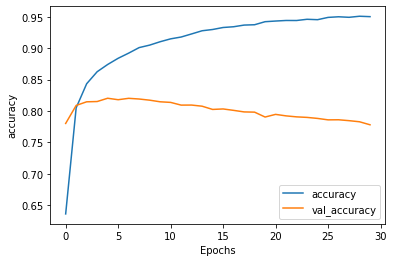

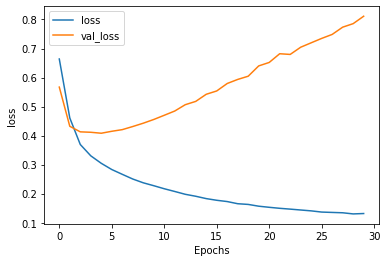

In [ ]:
# import matplotlib.pyplot as plt

# def plot_graphs(history, string):
#   plt.plot(history.history[string])
#   plt.plot(history.history['val_' + string])
#   plt.xlabel("Epochs")
#   plt.ylabel(string)
#   plt.legend([string, 'val_' + string])
#   plt.show()

# plot_graphs(history, 'accuracy')
# plot_graphs(history, 'loss')

#Mecab 넣어서 돌리기

In [ ]:
# sentences = MECAB_train
# labels = train_data['label']

In [ ]:
# vocab_size = 10000
# embedding_dim = 16
# max_length = 100
# truct_type = 'post'
# padding_type = 'post'
# oov_tok = '<OOV>'
# training_size = 20000

In [ ]:
# training_sentences = sentences[:training_size]
# testing_sentences = sentences[training_size:]

# training_labels = labels[:training_size]
# testing_labels = labels[training_size:]

In [ ]:
# tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
# tokenizer.fit_on_texts(training_sentences)
# word_index = tokenizer.word_index

# training_sequences  = tokenizer.texts_to_sequences(training_sentences)
# training_padded = pad_sequences(training_sequences, maxlen=max_length, 
#                                 padding=padding_type, truncating=truct_type)


# testing_sequences  = tokenizer.texts_to_sequences(testing_sentences)
# testing_padded = pad_sequences(testing_sequences, maxlen=max_length, 
#                                 padding=padding_type, truncating=truct_type)


In [ ]:
# import numpy as np

# training_padded = np.array(training_padded)
# training_labels = np.array(training_labels)

# testing_padded = np.array(testing_padded)
# testing_labels = np.array(testing_labels)

In [ ]:
# model = tf.keras.Sequential(
#     [tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
#      tf.keras.layers.GlobalAveragePooling1D(),
#      tf.keras.layers.Dense(24, activation='relu'),
#      tf.keras.layers.Dense(1, activation='sigmoid')]
# )

# model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [ ]:
# model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 100, 16)           160000    
_________________________________________________________________
global_average_pooling1d_1 ( (None, 16)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 24)                408       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 25        
Total params: 160,433
Trainable params: 160,433
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# num_epochs = 30
# history = model.fit(training_padded, training_labels, epochs=num_epochs, validation_data=(testing_padded, testing_labels), verbose=2)

Epoch 1/30
625/625 - 5s - loss: 0.6278 - accuracy: 0.6729 - val_loss: 0.4935 - val_accuracy: 0.7906
Epoch 2/30
625/625 - 5s - loss: 0.4188 - accuracy: 0.8191 - val_loss: 0.4151 - val_accuracy: 0.8161
Epoch 3/30
625/625 - 5s - loss: 0.3506 - accuracy: 0.8510 - val_loss: 0.4033 - val_accuracy: 0.8194
Epoch 4/30
625/625 - 5s - loss: 0.3119 - accuracy: 0.8706 - val_loss: 0.4044 - val_accuracy: 0.8224
Epoch 5/30
625/625 - 5s - loss: 0.2855 - accuracy: 0.8844 - val_loss: 0.4091 - val_accuracy: 0.8219
Epoch 6/30
625/625 - 5s - loss: 0.2645 - accuracy: 0.8928 - val_loss: 0.4180 - val_accuracy: 0.8210
Epoch 7/30
625/625 - 5s - loss: 0.2448 - accuracy: 0.9029 - val_loss: 0.4311 - val_accuracy: 0.8194
Epoch 8/30
625/625 - 5s - loss: 0.2285 - accuracy: 0.9101 - val_loss: 0.4440 - val_accuracy: 0.8171
Epoch 9/30
625/625 - 5s - loss: 0.2160 - accuracy: 0.9152 - val_loss: 0.4746 - val_accuracy: 0.8085
Epoch 10/30
625/625 - 6s - loss: 0.2045 - accuracy: 0.9205 - val_loss: 0.4820 - val_accuracy: 0.8132

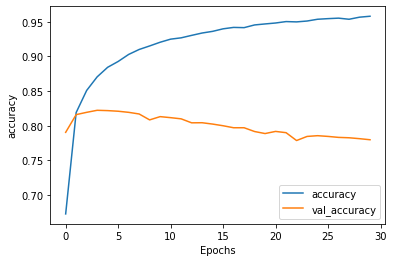

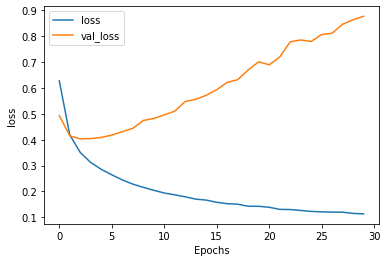

In [ ]:
# import matplotlib.pyplot as plt

# def plot_graphs(history, string):
#   plt.plot(history.history[string])
#   plt.plot(history.history['val_' + string])
#   plt.xlabel("Epochs")
#   plt.ylabel(string)
#   plt.legend([string, 'val_' + string])
#   plt.show()

# plot_graphs(history, 'accuracy')
# plot_graphs(history, 'loss')

#train&test 제대로 들어가게 코드 수정하기(여기부터 진짜)

-> 그후엔 논문이랑 비슷하게 하이퍼파라미터 등 건드려주기



In [ ]:
import pandas as pd
import urllib.request
%matplotlib inline
import matplotlib.pyplot as plt
import re
# from konlpy.tag import Okt
from tensorflow.keras.preprocessing.text import Tokenizer
import numpy as np
from tensorflow.keras.preprocessing.sequence import pad_sequences
import pickle
import tensorflow as tf

In [ ]:
with open('/content/X_train_MECAB.pkl', 'rb') as a: #불러오기
    data1 = pickle.load(a)
with open('/content/X_test_MECAB.pkl', 'rb') as b: #불러오기
    data2 = pickle.load(b)
with open('/content/X_train_OKT.pkl', 'rb') as c: #불러오기
    data3 = pickle.load(c)
with open('/content/X_test_OKT.pkl', 'rb') as d: #불러오기
    data4 = pickle.load(d)            
with open('/content/train_label.pkl', 'rb') as e: #불러오기
    data5 = pickle.load(e)            
with open('/content/test_label.pkl', 'rb') as f: #불러오기
    data6 = pickle.load(f)                    

In [ ]:
X_train_MECAB = list(data1['X_train_MECAB'])
X_test_MECAB = list(data2['X_test_MECAB'])
X_train_OKT = list(data3['X_train_OKT'])
X_test_OKT = list(data4['X_test_OKT'])
training_labels = list(data5['train_labels'])
testing_labels = list(data6['test_labels'])

In [ ]:
MECAB_train = []
for i in range(len(X_train_MECAB)):
  MECAB_train.append((' ').join(X_train_MECAB[i]))
MECAB_train

MECAB_test = []
for i in range(len(X_test_MECAB)):
  MECAB_test.append((' ').join(X_test_MECAB[i]))
MECAB_test

OKT_train = []
for i in range(len(X_train_OKT)):
  OKT_train.append((' ').join(X_train_OKT[i]))
OKT_train

OKT_test = []
for i in range(len(X_test_OKT)):
  OKT_test.append((' ').join(X_test_OKT[i]))
OKT_test
#다 붙여주기(원형복원 후 문장복원)

['굳다 ㅋ',
 '뭐 야 이 평점 들 은 나쁘다 않다 점 짜다 리 는 더 더욱 아니다',
 '지루하다 않다 완전 막장 임 돈 주다 보기 에는',
 '만 아니다 별 다섯 개 주다 왜 로 나오다 제 심기 를 불편하다 하다',
 '음악 이 주가 되다 최고 의 음악 영화',
 '진정하다 쓰레기',
 '마치 미국 애니 에서 튀어나오다 한 창의력 없다 로봇 디자인 부터가 고개 를 젖다 하다',
 '갈수록 개판 되다 중국영화 유치하다 내용 없다 폼 잡다 끝나다 말 도 안되다 무기 에 유치하다 남무 아 그리다 동사서독 같다 영화 가 이건 류 아 류작 이다',
 '이별 의 아픔 뒤 에 찾아오다 새롭다 인연 의 기쁨 모든 사람 이 그렇다 않다',
 '괜찮다 오랜 만 포켓몬스터 잼밌 어 요',
 '한국 독립영화 의 한계 그렇게 아버지 가 되다 비교 되다',
 '청춘 은 아름답다 그 아름답다 움 은 이성 을 흔들다 놓다 찰나 의 아름답다 움 을 자다 포착 한 섬세하다 아름답다 수채화 같다 퀴어 영화 이다',
 '눈 에 보이다 반전 이다 영화 의 흡인 력 은 사라지다 않다',
 '스토리 연출 연기 비주 얼 등 영화 의 기본 조차 안되다 영화 에 무슨 평 을 해 이렇다 영화 찍다 김문옥 감독 은 내 가 영화 경력 이 몇 인데 조무래기 들 이 내 영화 를 평론 하다 같다 마인드 에 빠지다',
 '소위 ㅈ 문 가라 는 평점 은 뭐 냐',
 '최고',
 '발연기 도저히 못 보다 진짜 이렇게 연기 를 못 하다 상상 도 못 하다',
 '나이스',
 '별 재미 도 없다 우려 먹다 챔프 에서 방송 몇번 하다 ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ',
 '일 의 금요일 나이트메어 시리즈 와 함께 가장 많다 시리즈 를 양산 해내다 헬레 이 저 시리즈 의 첫 편 작가 의 상상력 이 돋보이다 작품 이며 갈고리 로 사지 찢다 고어씬 은 지금 보더 라도 상당하다 잔인하다 충격 적 이다',
 '나름 교훈 돋다 하지만 어쩔 수없이 저 평점 받다 없다 저 질 섹스 코미디',
 '꽤 재밌다 보다 영화 이다',
 '민주화 시대 의 

In [ ]:
vocab_size = 30000#
embedding_dim = 50#
max_length = 70#
truct_type = 'pre'#
padding_type = 'pre'#
oov_tok = '<OOV>'
#표시는 선생님것과 다르게 임의로 바꿔본 것

In [ ]:
training_sentences = OKT_train
testing_sentences = OKT_test


In [ ]:
# training_sentences = MECAB_train
# testing_sentences = MECAB_test

In [ ]:
len(training_sentences),len(training_labels),len(testing_sentences), len(testing_labels)

(145791, 145791, 48995, 48995)

In [ ]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index

training_sequences  = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_length, 
                                padding=padding_type, truncating=truct_type)


testing_sequences  = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, 
                                padding=padding_type, truncating=truct_type)


In [ ]:
word_index, training_sequences[:10], training_padded[:10], testing_sequences[:10], testing_padded[:10]

({'<OOV>': 1,
  '이': 2,
  '영화': 3,
  '보다': 4,
  '하다': 5,
  '의': 6,
  '에': 7,
  '가': 8,
  '을': 9,
  '도': 10,
  '들': 11,
  '는': 12,
  '를': 13,
  '은': 14,
  '없다': 15,
  '이다': 16,
  '있다': 17,
  '좋다': 18,
  '너무': 19,
  '다': 20,
  '정말': 21,
  '한': 22,
  '되다': 23,
  '재밌다': 24,
  '적': 25,
  '만': 26,
  '같다': 27,
  '진짜': 28,
  '으로': 29,
  '로': 30,
  '아니다': 31,
  '않다': 32,
  '점': 33,
  '에서': 34,
  '만들다': 35,
  '과': 36,
  '나오다': 37,
  '연기': 38,
  '것': 39,
  '평점': 40,
  '내': 41,
  '최고': 42,
  '그': 43,
  '나': 44,
  '안': 45,
  '인': 46,
  '스토리': 47,
  '생각': 48,
  '못': 49,
  '왜': 50,
  '드라마': 51,
  '게': 52,
  '감동': 53,
  '사람': 54,
  '보고': 55,
  '이렇다': 56,
  '말': 57,
  '고': 58,
  '아깝다': 59,
  '더': 60,
  '배우': 61,
  '때': 62,
  'ㅋㅋ': 63,
  '와': 64,
  '아': 65,
  '감독': 66,
  '거': 67,
  '그냥': 68,
  '재미있다': 69,
  '요': 70,
  '재미': 71,
  '시간': 72,
  '내용': 73,
  '뭐': 74,
  '까지': 75,
  '중': 76,
  '주다': 77,
  '좀': 78,
  '자다': 79,
  '하고': 80,
  '지루하다': 81,
  '재미없다': 82,
  '쓰레기': 83,
  '수': 84,
  '네': 85,
  '모르다': 8

In [ ]:
training_padded = np.array(training_padded)
training_labels = np.array(training_labels)

testing_padded = np.array(testing_padded)
testing_labels = np.array(testing_labels)
#Array로 바꿔주기

# concatenate 시도는 해봤다

In [ ]:
model = tf.keras.Sequential(
    [tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
     tf.keras.layers.Conv1D(100, 2, activation='relu', padding='same'),
     tf.keras.regularizers.L2(l2=3)
     tf.keras.layers.GlobalAveragePooling1D(),
     tf.keras.layers.Dropout(0.5),
     tf.keras.layers.Dense(1, activation='sigmoid')]
)

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 70, 50)            1500000   
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 70, 100)           10100     
_________________________________________________________________
global_average_pooling1d_3 ( (None, 100)               0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 101       
Total params: 1,510,201
Trainable params: 1,510,201
Non-trainable params: 0
_________________________________________________________________


In [ ]:
num_epochs = 5
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=0, verbose=0, mode='auto', baseline=None, restore_best_weights=True)
history = model.fit(training_padded, training_labels, epochs=num_epochs, validation_data=(testing_padded, testing_labels), verbose=2, callbacks=[callback])
###첫시험(30000,2,100,pre,pre)
# Epoch 1/10
# 4556/4556 - 8s - loss: 0.3719 - accuracy: 0.8484 - val_loss: 0.3709 - val_accuracy: 0.8414
# Epoch 2/10
# 4556/4556 - 9s - loss: 0.3661 - accuracy: 0.8510 - val_loss: 0.3735 - val_accuracy: 0.8403
# Epoch 3/10
# 4556/4556 - 10s - loss: 0.3549 - accuracy: 0.8534 - val_loss: 0.3731 - val_accuracy: 0.8399
# Epoch 4/10
# 4556/4556 - 8s - loss: 0.3450 - accuracy: 0.8562 - val_loss: 0.3772 - val_accuracy: 0.8399
# Epoch 5/10
# 4556/4556 - 9s - loss: 0.3409 - accuracy: 0.8570 - val_loss: 0.3782 - val_accuracy: 0.8352
# Epoch 6/10
# 4556/4556 - 9s - loss: 0.3378 - accuracy: 0.8585 - val_loss: 0.3810 - val_accuracy: 0.8372
# Epoch 7/10
# 4556/4556 - 8s - loss: 0.3358 - accuracy: 0.8585 - val_loss: 0.3852 - val_accuracy: 0.8333
# Epoch 8/10
# 4556/4556 - 9s - loss: 0.3312 - accuracy: 0.8592 - val_loss: 0.3899 - val_accuracy: 0.8368
# Epoch 9/10
# 4556/4556 - 8s - loss: 0.3289 - accuracy: 0.8591 - val_loss: 0.3909 - val_accuracy: 0.8335
# Epoch 10/10
# 4556/4556 - 9s - loss: 0.3261 - accuracy: 0.8609 - val_loss: 0.3943 - val_accuracy: 0.8341

# ###30000,10,100,post,post
# Epoch 1/5
# 4556/4556 - 21s - loss: 0.5256 - accuracy: 0.7553 - val_loss: 0.4094 - val_accuracy: 0.8320
# Epoch 2/5
# 4556/4556 - 20s - loss: 0.4249 - accuracy: 0.8179 - val_loss: 0.3938 - val_accuracy: 0.8376
# Epoch 3/5
# 4556/4556 - 20s - loss: 0.4050 - accuracy: 0.8302 - val_loss: 0.3939 - val_accuracy: 0.8373
# Epoch 4/5
# 4556/4556 - 20s - loss: 0.3877 - accuracy: 0.8411 - val_loss: 0.3970 - val_accuracy: 0.8396
# Epoch 5/5
# 4556/4556 - 20s - loss: 0.3744 - accuracy: 0.8484 - val_loss: 0.3978 - val_accuracy: 0.8377
# ###30000,10,100,pre,pre
# Epoch 1/5
# 4556/4556 - 21s - loss: 0.4951 - accuracy: 0.7652 - val_loss: 0.3890 - val_accuracy: 0.8314
# Epoch 2/5
# 4556/4556 - 22s - loss: 0.3905 - accuracy: 0.8395 - val_loss: 0.3682 - val_accuracy: 0.8405
# Epoch 3/5
# 4556/4556 - 21s - loss: 0.3659 - accuracy: 0.8530 - val_loss: 0.3636 - val_accuracy: 0.8417
# Epoch 4/5
# 4556/4556 - 20s - loss: 0.3530 - accuracy: 0.8598 - val_loss: 0.3631 - val_accuracy: 0.8405
# Epoch 5/5
# 4556/4556 - 21s - loss: 0.3409 - accuracy: 0.8641 - val_loss: 0.3679 - val_accuracy: 0.8392
# -> pre가 낫구나

# ### 30000,3,70,pre,pre,conv1d 100/3
# Epoch 1/5
# 4556/4556 - 23s - loss: 0.4598 - accuracy: 0.7869 - val_loss: 0.3920 - val_accuracy: 0.8345
# Epoch 2/5
# 4556/4556 - 23s - loss: 0.3630 - accuracy: 0.8491 - val_loss: 0.3758 - val_accuracy: 0.8397
# Epoch 3/5
# 4556/4556 - 23s - loss: 0.3369 - accuracy: 0.8618 - val_loss: 0.3745 - val_accuracy: 0.8420
# Epoch 4/5
# 4556/4556 - 23s - loss: 0.3186 - accuracy: 0.8692 - val_loss: 0.3732 - val_accuracy: 0.8434
# Epoch 5/5
# 4556/4556 - 24s - loss: 0.3046 - accuracy: 0.8764 - val_loss: 0.3776 - val_accuracy: 0.8432
# ####30000,50,70,pre,pre
# Epoch 1/5
# 4556/4556 - 107s - loss: 0.4134 - accuracy: 0.8164 - val_loss: 0.3663 - val_accuracy: 0.8431
# Epoch 2/5
# 4556/4556 - 139s - loss: 0.3335 - accuracy: 0.8612 - val_loss: 0.3638 - val_accuracy: 0.8453
# Epoch 3/5
# 4556/4556 - 135s - loss: 0.3007 - accuracy: 0.8761 - val_loss: 0.3700 - val_accuracy: 0.8447
# Epoch 4/5
# 4556/4556 - 127s - loss: 0.2747 - accuracy: 0.8879 - val_loss: 0.3791 - val_accuracy: 0.8424
# Epoch 5/5
# 4556/4556 - 120s - loss: 0.2557 - accuracy: 0.8964 - val_loss: 0.3975 - val_accuracy: 0.8414
# ####
# Epoch 1/5
# 4556/4556 - 143s - loss: 0.4038 - accuracy: 0.8204 - val_loss: 0.3628 - val_accuracy: 0.8440
# Epoch 2/5
# 4556/4556 - 132s - loss: 0.3277 - accuracy: 0.8623 - val_loss: 0.3596 - val_accuracy: 0.8461
# Epoch 3/5
# 4556/4556 - 133s - loss: 0.2973 - accuracy: 0.8774 - val_loss: 0.3672 - val_accuracy: 0.8460
# Epoch 4/5
# 4556/4556 - 141s - loss: 0.2748 - accuracy: 0.8872 - val_loss: 0.3781 - val_accuracy: 0.8438
# Epoch 5/5
# 4556/4556 - 140s - loss: 0.2576 - accuracy: 0.8955 - val_loss: 0.3917 - val_accuracy: 0.8435

Epoch 1/5
4556/4556 - 100s - loss: 0.3811 - accuracy: 0.8516 - val_loss: 0.3858 - val_accuracy: 0.8432
Epoch 2/5
4556/4556 - 99s - loss: 0.3656 - accuracy: 0.8584 - val_loss: 0.3868 - val_accuracy: 0.8398


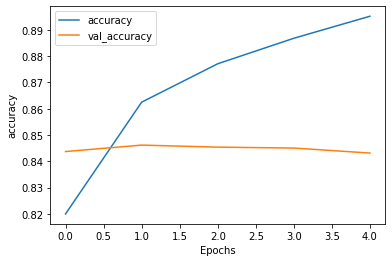

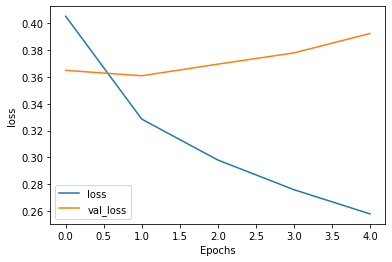

In [ ]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_' + string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_' + string])
  plt.show()

plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')

In [ ]:
from tensorflow.keras.models import load_model
model.save('my_model.h5')

In [ ]:
model1 = load_model('/content/my_model.h5')

In [ ]:
model1.fit(training_padded, training_labels, epochs=num_epochs, validation_data=(testing_padded, testing_labels), verbose=2, callbacks=[callback])

Epoch 1/5
4556/4556 - 102s - loss: 0.3661 - accuracy: 0.8580 - val_loss: 0.3834 - val_accuracy: 0.8432
Epoch 2/5
4556/4556 - 99s - loss: 0.3552 - accuracy: 0.8619 - val_loss: 0.3833 - val_accuracy: 0.8435
Epoch 3/5
4556/4556 - 100s - loss: 0.3457 - accuracy: 0.8663 - val_loss: 0.3884 - val_accuracy: 0.8416
